#                           Insurance Claim Fraud Detection

### Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


#### Some independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy    period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,validation_curve
from sklearn.metrics import accuracy_score,auc,confusion_matrix,plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\internship\data\Data-Science-ML-Capstone-Projects-master\Automobile_insurance_fraud.csv")

In [3]:
df.head(10)    # top 12 data has to be displayed

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   
7                 165   37         429027       03-02-1990           IL   
8                  27   33         485665       05-02-1997           IL   
9                 212   42         636550       25-07-2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   
5       478456  ...                      NO              64100         6410   
6       441716  ...                       ?              78650        21450   
7       603195  ...                     YES              51590         9380   
8       601734  ...                     YES              27700         2770   
9       600983  ...                       ?              42300         4700   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   
5           6410         51280       Saab          95      2003   
6           7150         50050     Nissan  Pathfinder      2012   
7           9380         32830       Audi          A5      2015   
8           2770         22160     Toyota       Camry      2012   
9           4700         32900       Saab         92x      1996   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  
5              Y  NaN  
6              N  NaN  
7              N  NaN  
8              N  NaN  
9              N  NaN  

[10 rows x 40 columns]

In [4]:
df.shape     # checking the shape of the data 

(1000, 40)

In [5]:
df.drop_duplicates(inplace=True)    # dropping duplicates

In [6]:
df.shape          # checking the shape again after dropping duplicates

(1000, 40)

As we can see, there is no change in the shape of the data, which means there are no duplicate entries in the data.

In [7]:
df.info()     # taking info about data columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In the data, in the column "_c39," there are no entries available, so we will drop this column as it will cause errors in the future.

In [8]:
df=df.drop('_c39',axis=1)

In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [10]:
df.head(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   

  fraud_reported  
0              Y  
1              Y  

[2 rows x 39 columns]

In [11]:
df.isnull().sum()  # checking null values in data

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no null values in the data; now we can do further iterations on the data.

In [12]:
df.nunique().sort_values()     # Checkinhg the unique values in data columns.

fraud_reported                    2
insured_sex                       2
police_report_available           3
bodily_injuries                   3
policy_state                      3
policy_csl                        3
policy_deductable                 3
property_damage                   3
witnesses                         4
number_of_vehicles_involved       4
incident_severity                 4
incident_type                     4
collision_type                    4
authorities_contacted             5
insured_relationship              6
insured_education_level           7
incident_city                     7
incident_state                    7
umbrella_limit                   11
auto_make                        14
insured_occupation               14
insured_hobbies                  20
auto_year                        21
incident_hour_of_the_day         24
auto_model                       39
age                              46
incident_date                    60
capital-gains               

In [13]:
print(df['fraud_reported'].value_counts())
print(df['insured_sex'].value_counts())
print(df['police_report_available'].value_counts())
print(df['bodily_injuries'].value_counts())
print(df['policy_state'].value_counts())
print(df['policy_csl'].value_counts())
print(df['policy_deductable'].value_counts())
print(df['property_damage'].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
?      343
NO     343
YES    314
Name: police_report_available, dtype: int64
0    340
2    332
1    328
Name: bodily_injuries, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
?      360
NO     338
YES    302
Name: property_damage, dtype: int64


Now we will replace the values of some columns: fraud_reported and insured_sex.

In [14]:
# mapping of insured_sex values
map_sex = {'MALE': 0, 'FEMALE': 1}
# Now replce the old values with new one
df['insured_sex']=df['insured_sex'].map(map_sex)

# mapping of fraud_reported values
map_rp={'N': 0, 'Y': 1}
# Now replce the old values with new one
df['fraud_reported']=df['fraud_reported'].map(map_rp)
# print data
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ...  witnesses police_report_available total_claim_amount  \
0         466132  ...          2                     YES              71610   
1         468176  ...          0                       ?               5070   
2         430632  ...          3                      NO              34650   
3         608117  ...          2                      NO              63400   
4         610706  ...          1                      NO               6500   
..           ...  ...        ...                     ...                ...   
995       431289  ...          1                       ?              87200   
996       608177  ...          3                       ?             108480   
997       442797  ...          3                     YES              67500   
998       441714  ...          1                     YES              46980   
999       612260  ...          3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              1  
1        2007              1  
2        2007              0  
3        2014              1  
4        2009              0  
..        ...            ...  
995      2006              0  
996      2015              0  
997      1996              0  
998      1998              0  


In [15]:
df.info()  # after replacing values checking info of data again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int64  
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [16]:
df.skew().sort_values()     # checking of skewness present in data

vehicle_claim                 -0.621098
total_claim_amount            -0.594582
capital-loss                  -0.391472
insured_sex                   -0.148630
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
policy_annual_premium          0.004402
bodily_injuries                0.014777
witnesses                      0.019636
policy_number                  0.038991
injury_claim                   0.264811
months_as_customer             0.362177
property_claim                 0.378169
policy_deductable              0.477887
capital-gains                  0.478850
age                            0.478988
number_of_vehicles_involved    0.502664
insured_zip                    0.816554
fraud_reported                 1.175051
umbrella_limit                 1.806712
dtype: float64

In [17]:
df.corr()['fraud_reported'].sort_values()   # checking correlation of data columns with target column.

insured_sex                   -0.030873
policy_number                 -0.029443
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_hour_of_the_day       0.004316
auto_year                      0.007928
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839
umbrella_limit                 0.058622
injury_claim                   0.090975
property_claim                 0.137835
total_claim_amount             0.163651
vehicle_claim                  0.170049
fraud_reported                 1.000000
Name: fraud_reported, dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

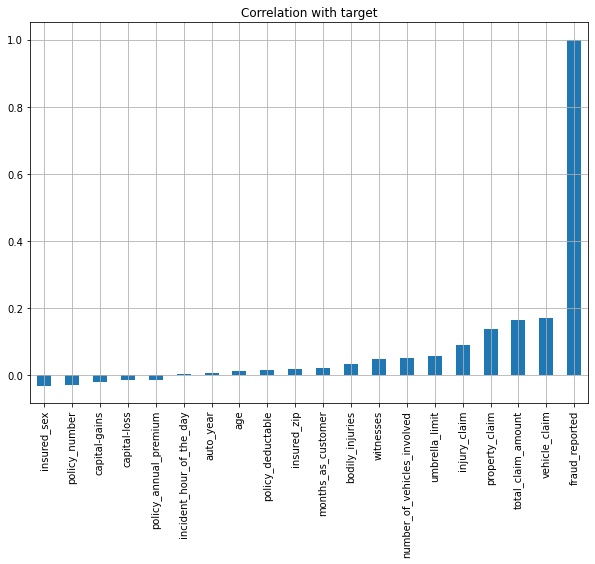

In [18]:
df.corr()['fraud_reported'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target')
# graphical representation of columns correaltiion with target column

In [19]:
df.corr()    # checking correlation of data columns with each other.

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                           -0.060925 -0.073337      -0.004564   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
fraud_reported                         0.020544  0.012143      -0.029443   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
insured_sex                           0.009733              -0.038853   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
fraud_reported                        0.014817              -0.014480   

                             umbrella_limit  insured_zip  insured_sex  \
months_as_customer                 0.015498     0.017895    -0.060925   
age                                0.018126     0.025604    -0.073337   
policy_number                      0.008968     0.007083    -0.004564   
policy_deductable                  0.010870     0.004545     0.009733   
policy_annual_premium             -0.006247     0.032354    -0.038853   
umbrella_limit                     1.000000     0.019671    -0.010688   
insured_zip                        0.019671     1.000000     0.036942   
insured_sex                       -0.010688     0.036942     1.000000   
capital-gains                     -0.047268     0.006303     0.020494   
capital-loss                      -0.024056     0.049372     0.021705   
incident_hour_of_the_day          -0.023257     0.008274    -0.019290   
number_of_vehicles_inv

In [20]:
df.describe().T   # looking at the description of data

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
insured_sex                  1000.0  5.370000e-01  4.988786e-01        0.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
fraud_reported               1000.0  2.470000e-01  4.314825e-01        0.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
insured_sex                       0.0000       1.0       1.000         1.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
fraud_reported                    0.0000       0.0       0.000         1.00

### Performing EDA (Visualization)

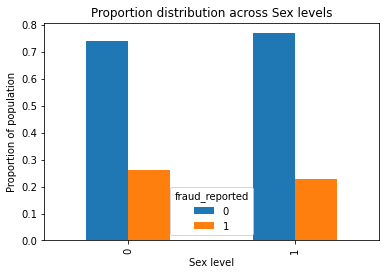

In [21]:
# Create a DataFrame containing the proportion distribution of fraud_reported across insured_sex levels
Fraud_reported = round(pd.crosstab(df.insured_sex, df.fraud_reported).div(pd.crosstab(df.insured_sex, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='bar', title='Proportion distribution across Sex levels')
ax.set_xlabel('Sex level')
ax.set_ylabel('Proportion of population')

plt.show()

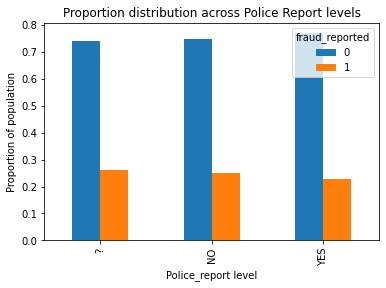

In [22]:
# Create a DataFrame containing the proportion distribution of fraud_reported across police_report_available levels
Fraud_reported = round(pd.crosstab(df.police_report_available, df.fraud_reported).div(pd.crosstab(df.police_report_available, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='bar', title='Proportion distribution across Police Report levels')
ax.set_xlabel('Police_report level')
ax.set_ylabel('Proportion of population')

plt.show()

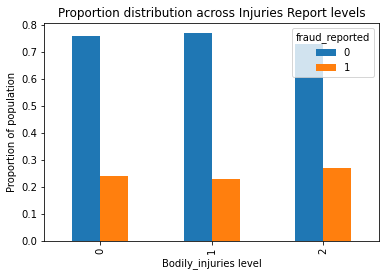

In [23]:
# Create a DataFrame containing the proportion distribution of fraud_reported across bodily_injuries levels
Fraud_reported = round(pd.crosstab(df.bodily_injuries, df.fraud_reported).div(pd.crosstab(df.bodily_injuries, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='bar', title='Proportion distribution across Injuries Report levels')
ax.set_xlabel('Bodily_injuries level')
ax.set_ylabel('Proportion of population')

plt.show()

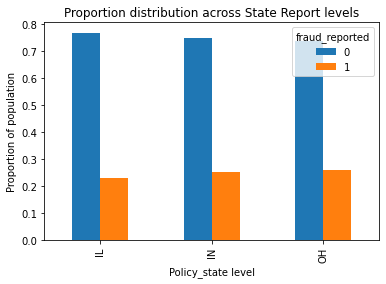

In [24]:
# Create a DataFrame containing the proportion distribution of fraud_reported across policy_state levels
Fraud_reported = round(pd.crosstab(df.policy_state, df.fraud_reported).div(pd.crosstab(df.policy_state, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='bar', title='Proportion distribution across State Report levels')
ax.set_xlabel('Policy_state level')
ax.set_ylabel('Proportion of population')

plt.show()

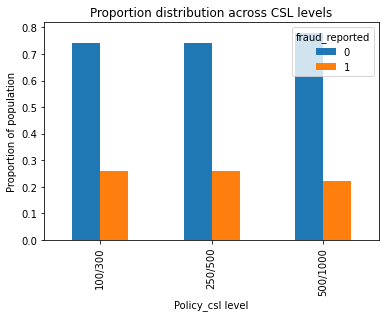

In [25]:
# Create a DataFrame containing the proportion distribution of fraud_reported across policy_csl levels
Fraud_reported = round(pd.crosstab(df.policy_csl, df.fraud_reported).div(pd.crosstab(df.policy_csl, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='bar', title='Proportion distribution across CSL levels')
ax.set_xlabel('Policy_csl level')
ax.set_ylabel('Proportion of population')

plt.show()

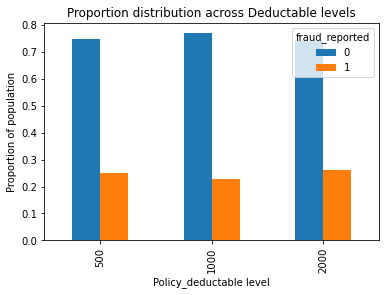

In [26]:
# Create a DataFrame containing the proportion distribution of fraud_reported across policy_deductable levels
Fraud_reported = round(pd.crosstab(df.policy_deductable, df.fraud_reported).div(pd.crosstab(df.policy_deductable, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='bar', title='Proportion distribution across Deductable levels')
ax.set_xlabel('Policy_deductable level')
ax.set_ylabel('Proportion of population')

plt.show()

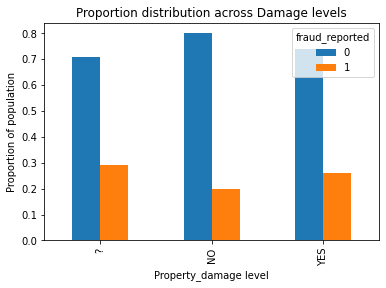

In [27]:
# Create a DataFrame containing the proportion distribution of fraud_reported across property_damage levels
Fraud_reported = round(pd.crosstab(df.property_damage, df.fraud_reported).div(pd.crosstab(df.property_damage, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='bar', title='Proportion distribution across Damage levels')
ax.set_xlabel('Property_damage level')
ax.set_ylabel('Proportion of population')

plt.show()

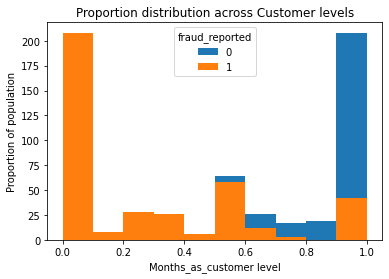

In [28]:
# Create a DataFrame containing the proportion distribution of fraud_reported across months_as_customer levels
Fraud_reported = round(pd.crosstab(df.months_as_customer, df.fraud_reported).div(pd.crosstab(df.months_as_customer, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='hist', title='Proportion distribution across Customer levels')
ax.set_xlabel('Months_as_customer level')
ax.set_ylabel('Proportion of population')

plt.show()

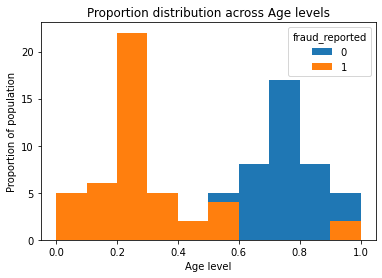

In [29]:
# Create a DataFrame containing the proportion distribution of fraud_reported across age levels
Fraud_reported = round(pd.crosstab(df.age, df.fraud_reported).div(pd.crosstab(df.age, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='hist', title='Proportion distribution across Age levels')
ax.set_xlabel('Age level')
ax.set_ylabel('Proportion of population')

plt.show()

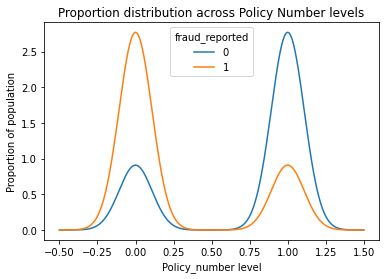

In [30]:
# Create a DataFrame containing the proportion distribution of fraud_reported across policy_number levels
Fraud_reported = round(pd.crosstab(df.policy_number, df.fraud_reported).div(pd.crosstab(df.policy_number, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='kde', title='Proportion distribution across Policy Number levels')
ax.set_xlabel('Policy_number level')
ax.set_ylabel('Proportion of population')

plt.show()

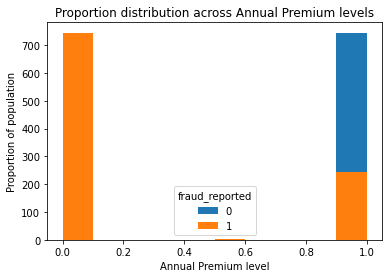

In [31]:
# Create a DataFrame containing the proportion distribution of fraud_reported across policy_annual_premium levels
Fraud_reported = round(pd.crosstab(df.policy_annual_premium, df.fraud_reported).div(pd.crosstab(df.policy_annual_premium, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='hist', title='Proportion distribution across Annual Premium levels')
ax.set_xlabel('Annual Premium level')
ax.set_ylabel('Proportion of population')

plt.show()

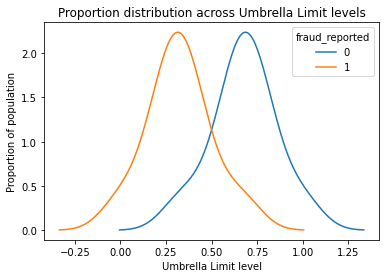

In [32]:
# Create a DataFrame containing the proportion distribution of fraud_reported across umbrella_limit levels
Fraud_reported = round(pd.crosstab(df.umbrella_limit, df.fraud_reported).div(pd.crosstab(df.umbrella_limit, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='kde', title='Proportion distribution across Umbrella Limit levels')
ax.set_xlabel('Umbrella Limit level')
ax.set_ylabel('Proportion of population')

plt.show()

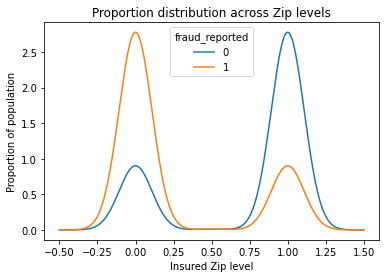

In [33]:
# Create a DataFrame containing the proportion distribution of fraud_reported across months_as_customer levels
Fraud_reported = round(pd.crosstab(df.insured_zip, df.fraud_reported).div(pd.crosstab(df.insured_zip, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='kde', title='Proportion distribution across Zip levels')
ax.set_xlabel('Insured Zip level')
ax.set_ylabel('Proportion of population')

plt.show()

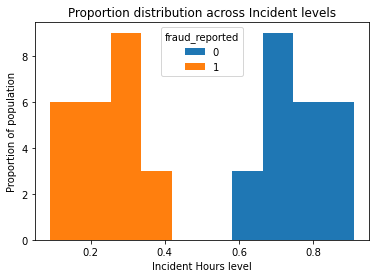

In [34]:
# Create a DataFrame containing the proportion distribution of fraud_reported across incident_hour_of_the_day levels
Fraud_reported = round(pd.crosstab(df.incident_hour_of_the_day, df.fraud_reported).div(pd.crosstab(df.incident_hour_of_the_day, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='hist', title='Proportion distribution across Incident levels')
ax.set_xlabel('Incident Hours level')
ax.set_ylabel('Proportion of population')

plt.show()

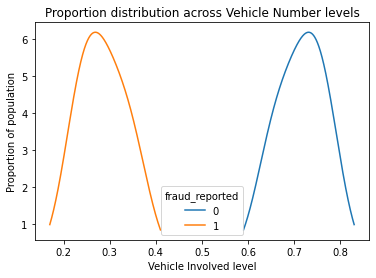

In [35]:
# Create a DataFrame containing the proportion distribution of fraud_reported across number_of_vehicles_involved levels
Fraud_reported = round(pd.crosstab(df.number_of_vehicles_involved, df.fraud_reported).div(pd.crosstab(df.number_of_vehicles_involved, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='kde', title='Proportion distribution across Vehicle Number levels')
ax.set_xlabel('Vehicle Involved level')
ax.set_ylabel('Proportion of population')

plt.show()

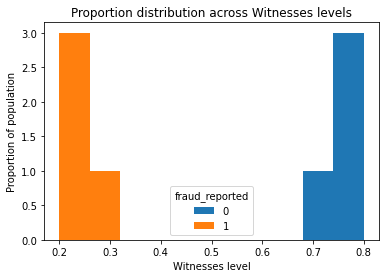

In [36]:
# Create a DataFrame containing the proportion distribution of fraud_reported across witnesses levels
Fraud_reported = round(pd.crosstab(df.witnesses, df.fraud_reported).div(pd.crosstab(df.witnesses, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='hist', title='Proportion distribution across Witnesses levels')
ax.set_xlabel('Witnesses level')
ax.set_ylabel('Proportion of population')

plt.show()

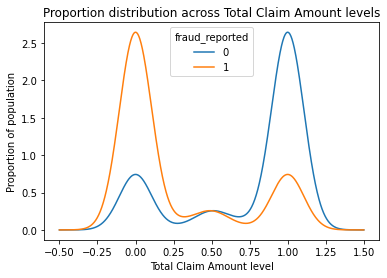

In [37]:
# Create a DataFrame containing the proportion distribution of fraud_reported across total_claim_amount levels
Fraud_reported = round(pd.crosstab(df.total_claim_amount, df.fraud_reported).div(pd.crosstab(df.total_claim_amount, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='kde', title='Proportion distribution across Total Claim Amount levels')
ax.set_xlabel('Total Claim Amount level')
ax.set_ylabel('Proportion of population')

plt.show()

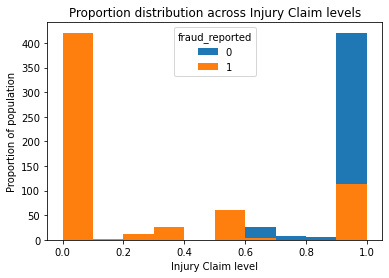

In [38]:
# Create a DataFrame containing the proportion distribution of fraud_reported across injury_claim levels
Fraud_reported = round(pd.crosstab(df.injury_claim, df.fraud_reported).div(pd.crosstab(df.injury_claim, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='hist', title='Proportion distribution across Injury Claim levels')
ax.set_xlabel('Injury Claim level')
ax.set_ylabel('Proportion of population')

plt.show()

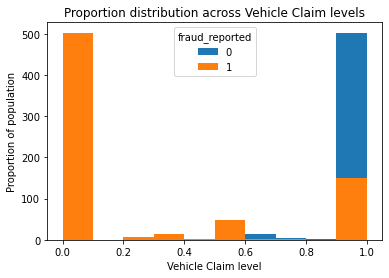

In [39]:
# Create a DataFrame containing the proportion distribution of fraud_reported across vehicle_claim levels
Fraud_reported = round(pd.crosstab(df.vehicle_claim, df.fraud_reported).div(pd.crosstab(df.vehicle_claim, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='hist', title='Proportion distribution across Vehicle Claim levels')
ax.set_xlabel('Vehicle Claim level')
ax.set_ylabel('Proportion of population')

plt.show()

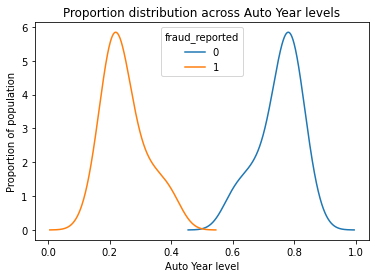

In [40]:
# Create a DataFrame containing the proportion distribution of fraud_reported across auto_year levels
Fraud_reported = round(pd.crosstab(df.auto_year, df.fraud_reported).div(pd.crosstab(df.auto_year, df.fraud_reported).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_report = Fraud_reported

# Plot the bar graph
ax = sorted_report.plot(kind='kde', title='Proportion distribution across Auto Year levels')
ax.set_xlabel('Auto Year level')
ax.set_ylabel('Proportion of population')

plt.show()

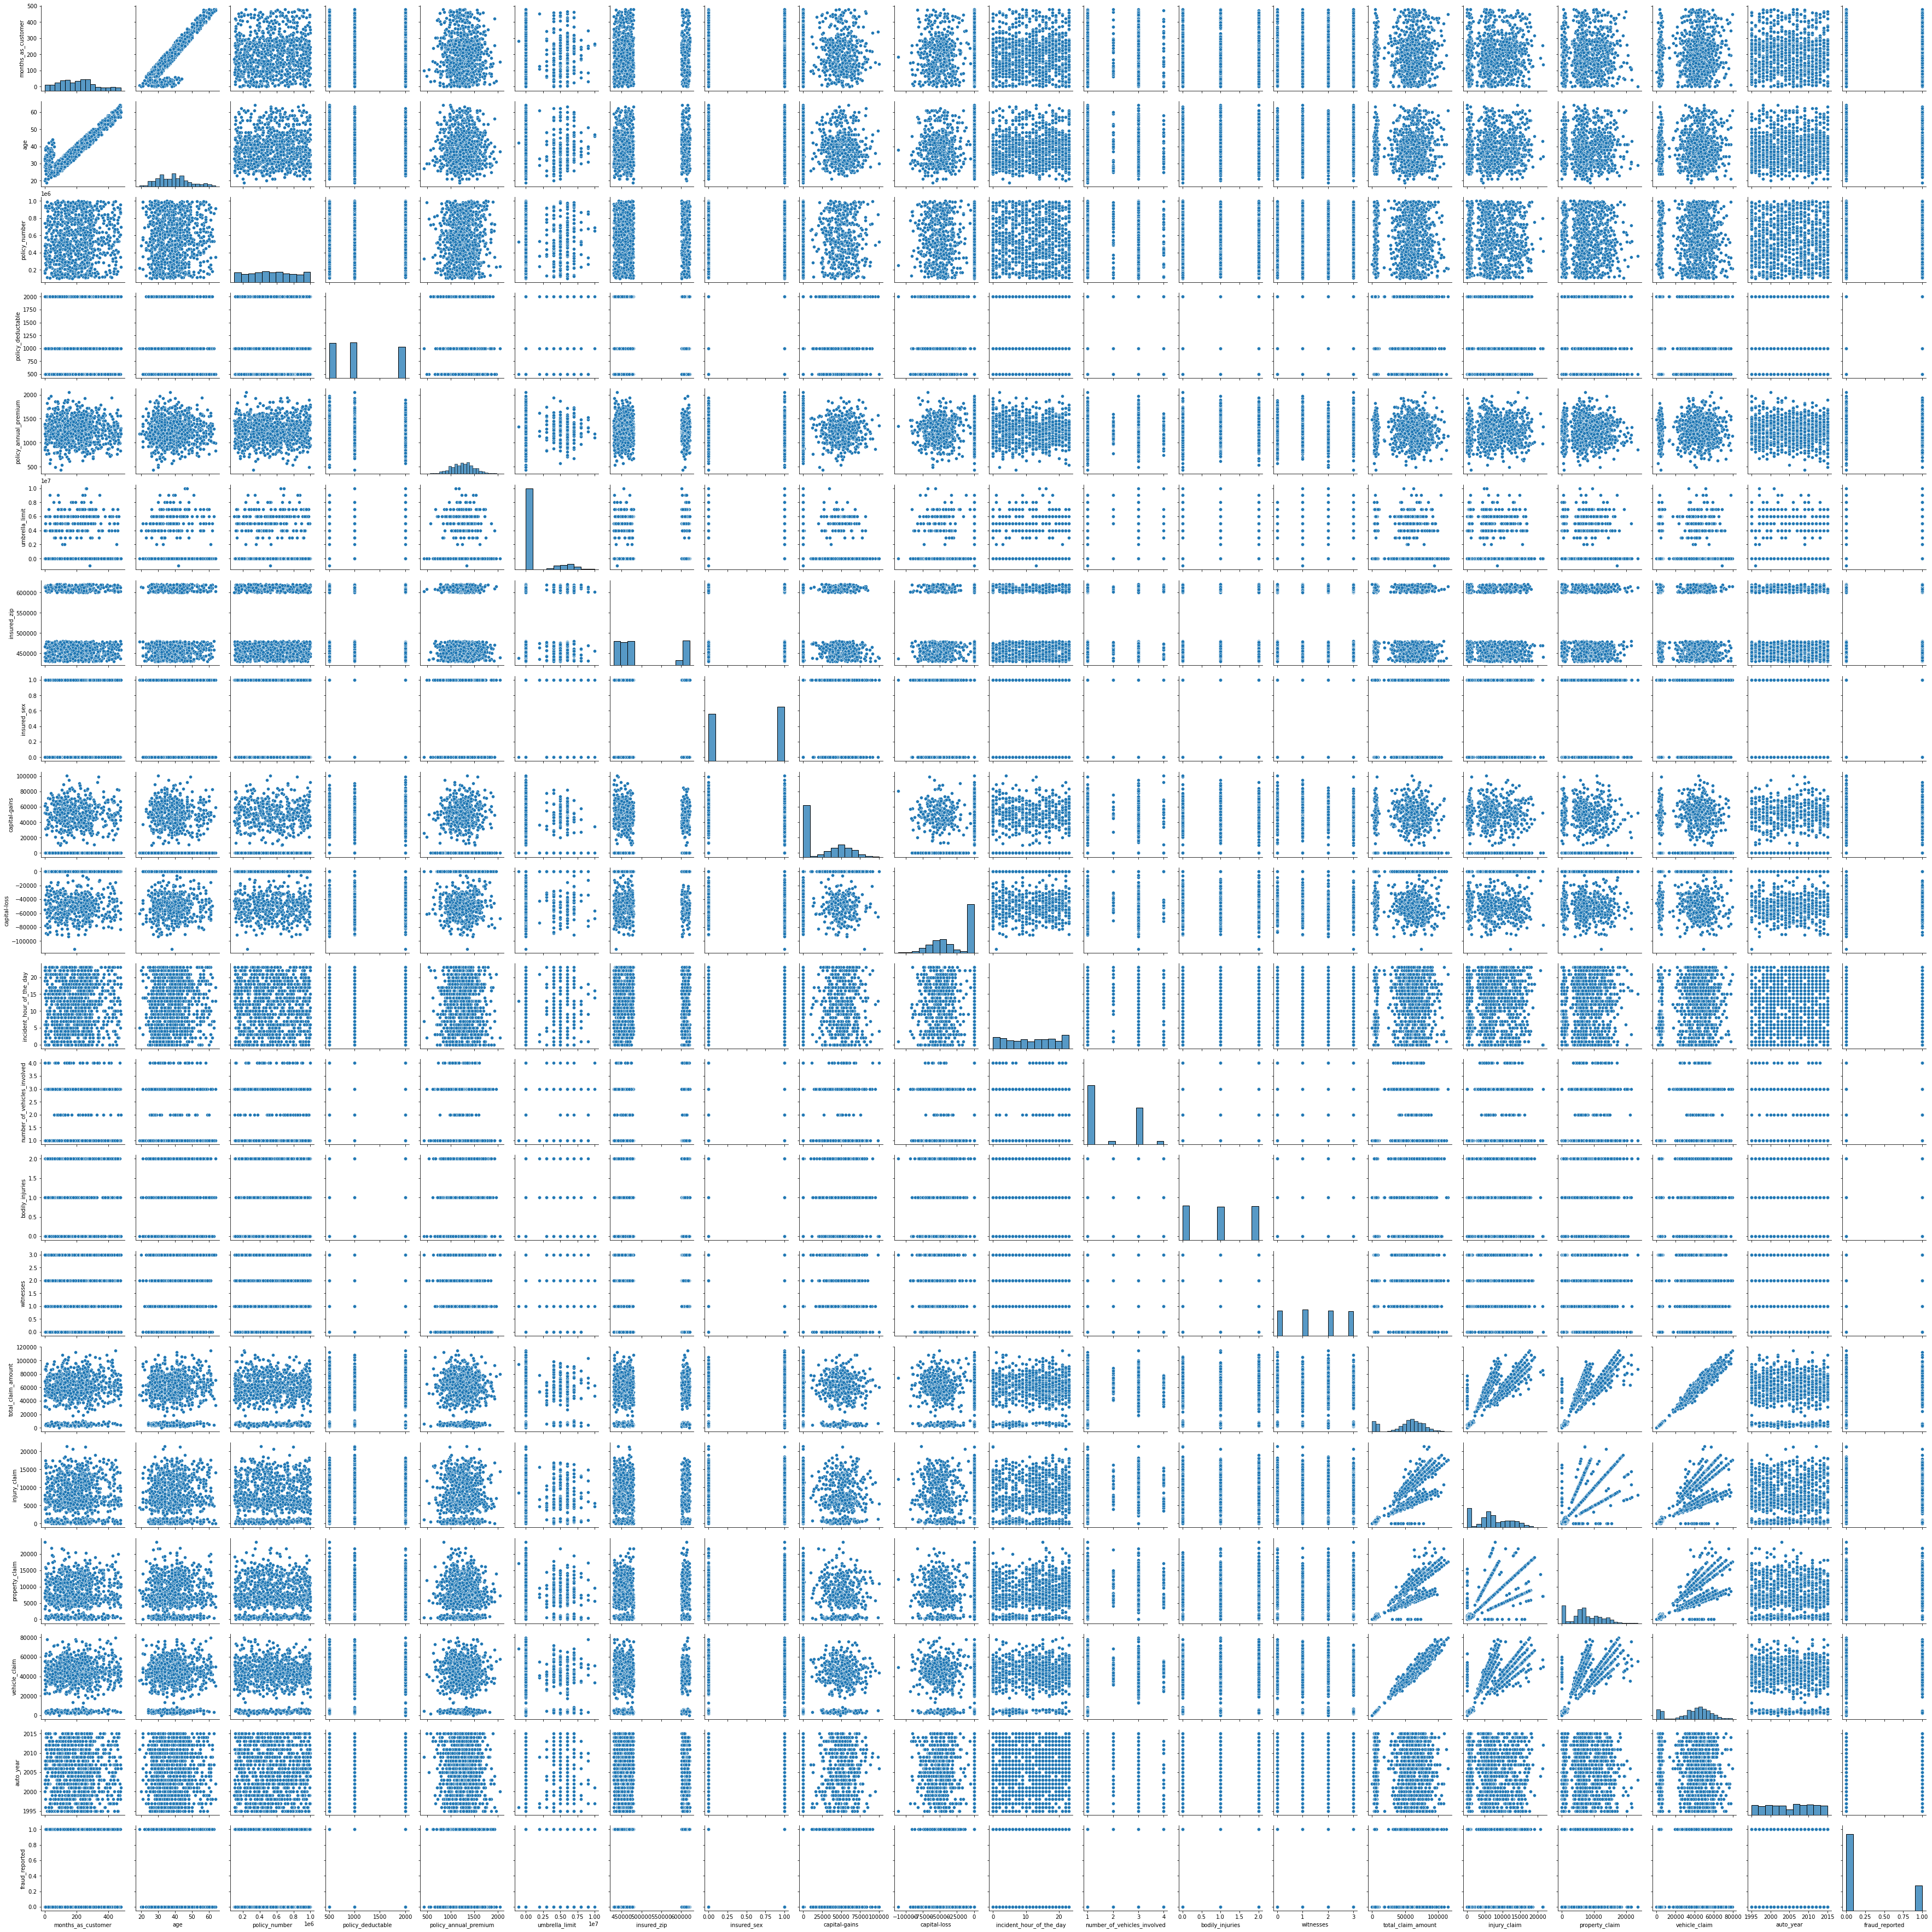

In [41]:
# Plotting pair plot of data and checking the relationship between each columns.
sns.pairplot(df)
plt.show()

<AxesSubplot:>

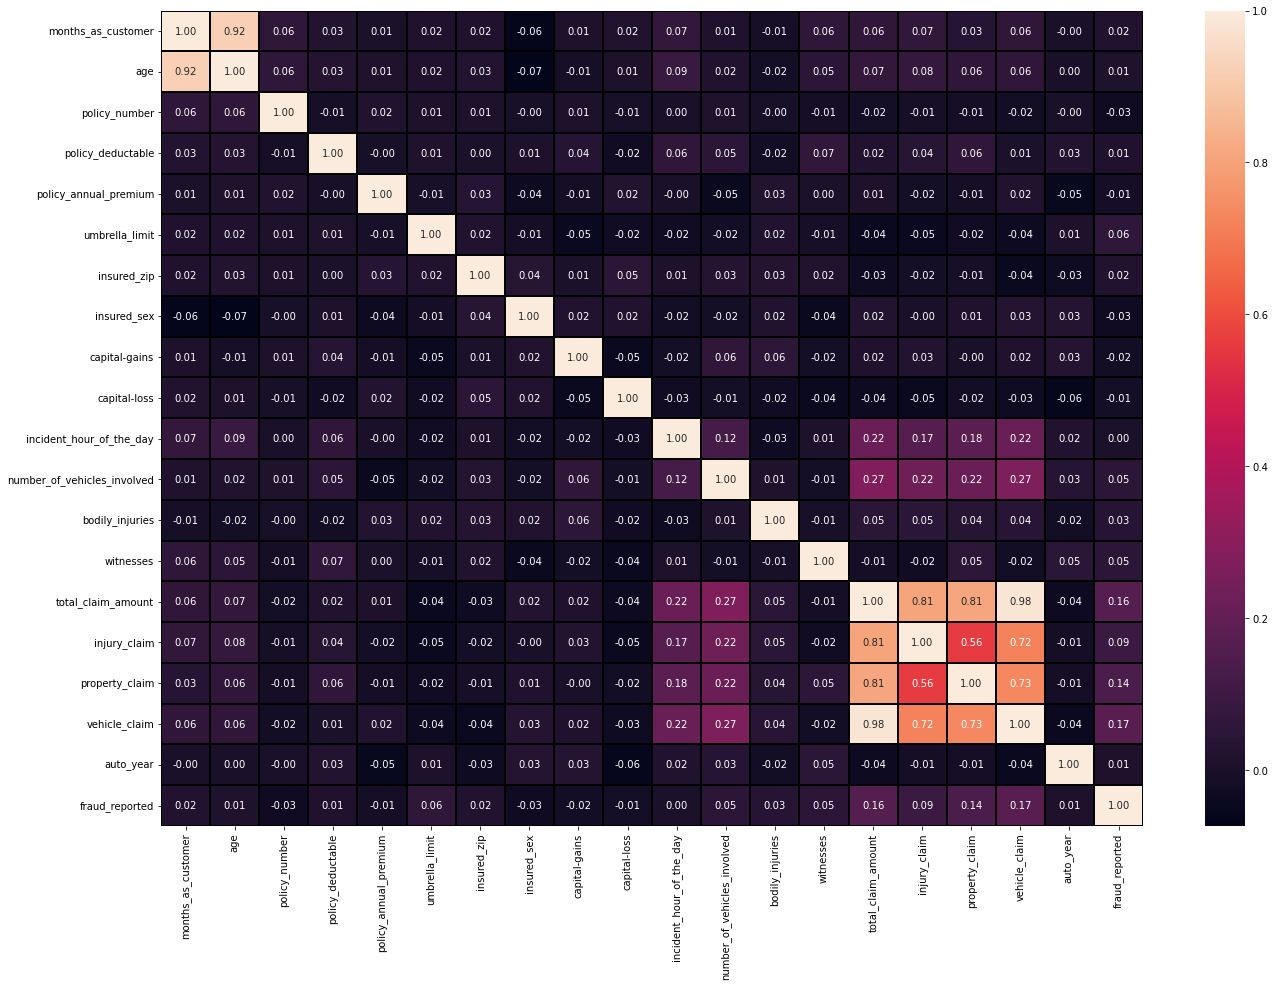

In [42]:
# plotting heat map
plt.figure(figsize=(22,15)) # ploting the heat map
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

### Analysing Numerical Features

In [43]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))
print(numerical_feature)

Numerical Features Count 20
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported']


In [44]:
# Discrete and Continues Features
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete feature Count 9
Continuous feature Count 11


In [45]:
print("Discrete Features are :",'\n',discrete_feature )
print('\n')
print("Continuous Features are :",'\n',continuous_feature )

Discrete Features are : 
 ['policy_deductable', 'umbrella_limit', 'insured_sex', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_year', 'fraud_reported']


Continuous Features are : 
 ['months_as_customer', 'age', 'policy_number', 'policy_annual_premium', 'insured_zip', 'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


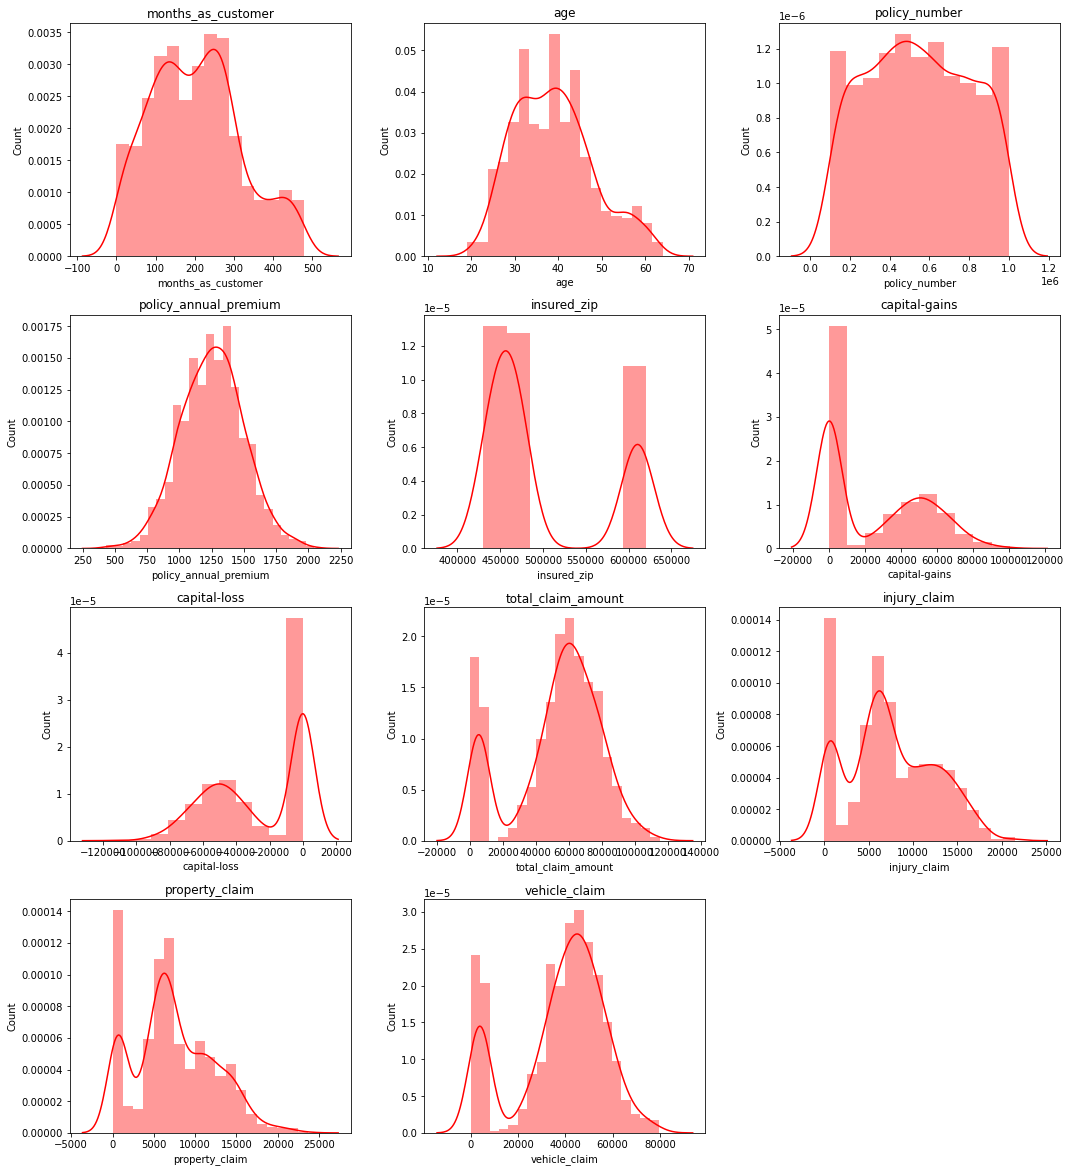

In [46]:
plt.figure(figsize=(15,20))
for i,feature in enumerate(continuous_feature):
    data=df.copy()
    plt.subplot(5,3,i+1)
    sns.distplot(df[feature],color='red')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
plt.tight_layout()    
plt.show()

			BOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM


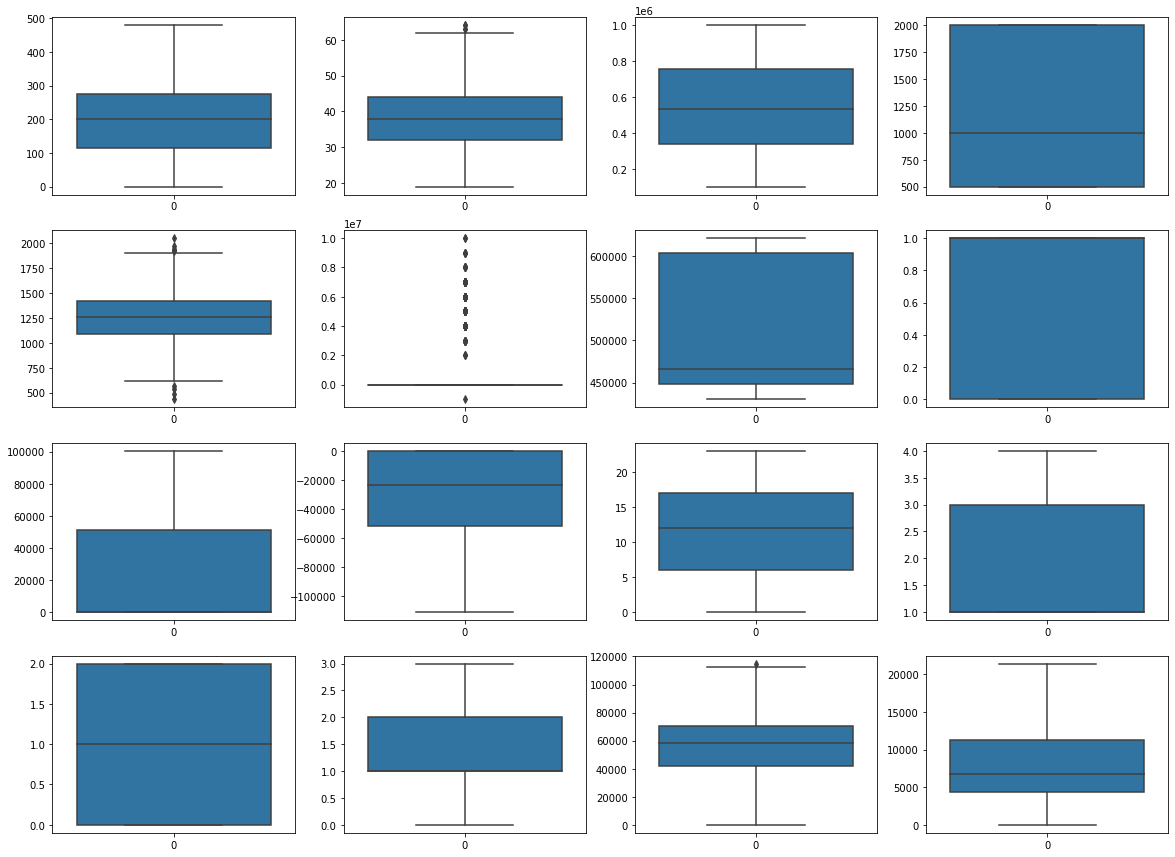

In [47]:
# Checking outliers in Numerical columns

n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,15))
print('\t\t\tBOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_feature[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
    
plt.show()

In [48]:
# Removing Outliers from Numerical Columns
def removeOutliers(numerical_feature):
    global df
    for i in range(len(numerical_feature)):
        q1 = df[numerical_feature[i]].quantile(0.25)
        q3 = df[numerical_feature[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df.loc[(df[numerical_feature[i]] <= minimum), numerical_feature[i]] = minimum
        df.loc[(df[numerical_feature[i]] >= maximum), numerical_feature[i]] = maximum 

In [49]:
removeOutliers(numerical_feature)

			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


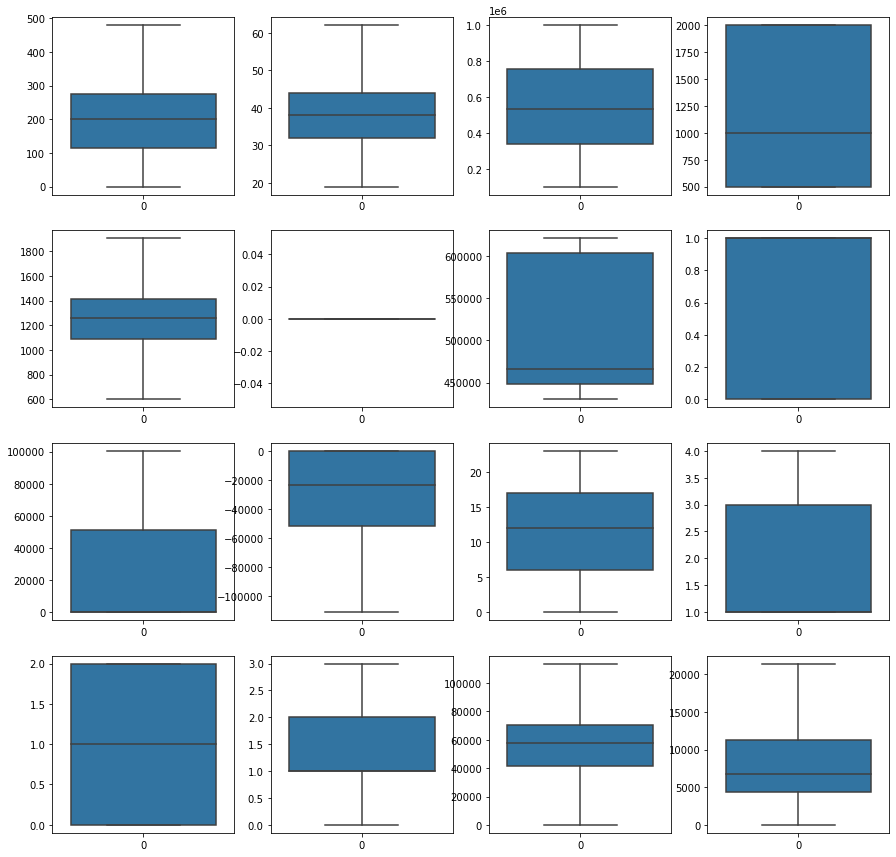

In [50]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_feature[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   float64
 10  insured_sex                  1000 non-null   float64
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [52]:
# dropping columns which have less use with data
df = df.drop(columns=['policy_bind_date','policy_state','policy_csl','insured_education_level','insured_occupation',
                      'insured_hobbies','insured_relationship','incident_date','incident_type','collision_type',
                      'incident_severity','authorities_contacted','incident_state','incident_city','incident_location',
                      'property_damage','police_report_available','auto_make','auto_model'], axis=1)

In [53]:
df.columns    # columns left after dropping columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported'],
      dtype='object')

### Splitting data into features and label

In [54]:
# now we willseprate features and labels
features=df.drop('fraud_reported',axis=1)
labels=df.fraud_reported

In [55]:
#scaling the data
scalar=PowerTransformer()
scaled_f=scalar.fit_transform(features)

In [56]:
scaled_f.shape

(1000, 19)

In [57]:
features.shape  # orignal and scaled shape is same 

(1000, 19)

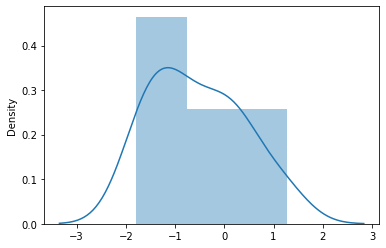

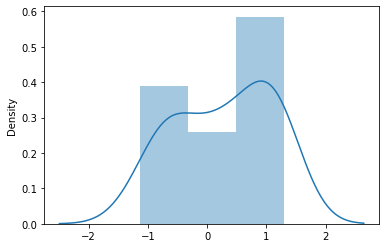

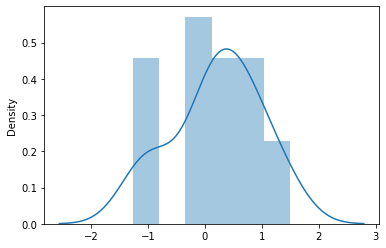

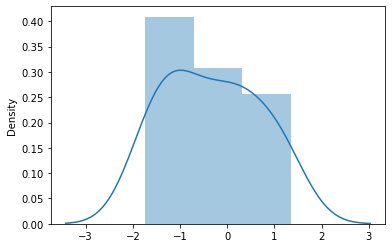

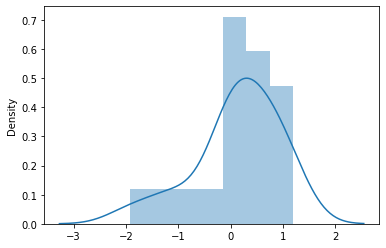

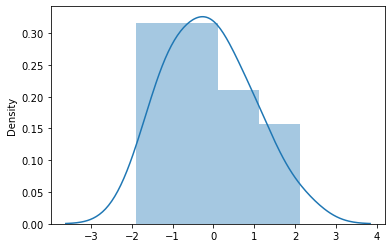

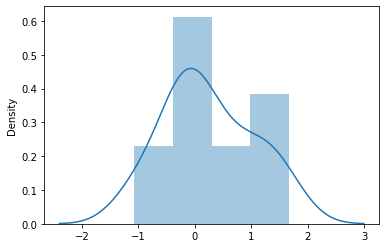

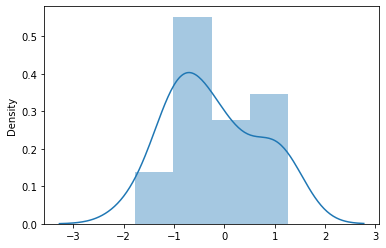

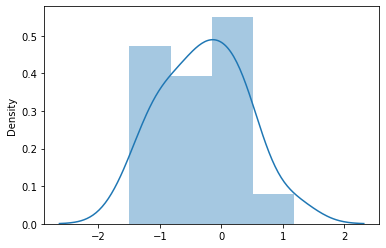

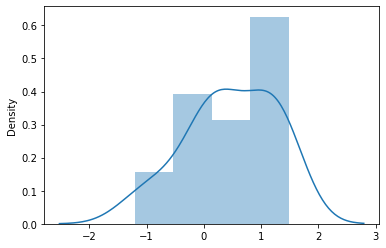

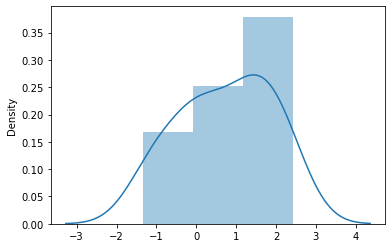

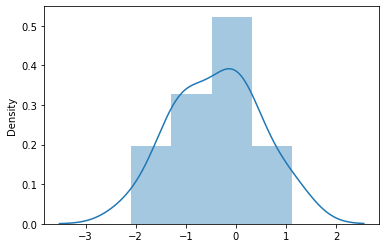

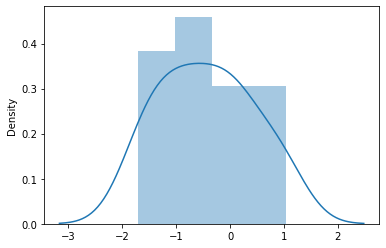

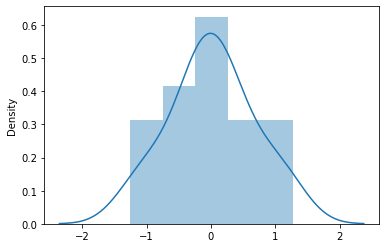

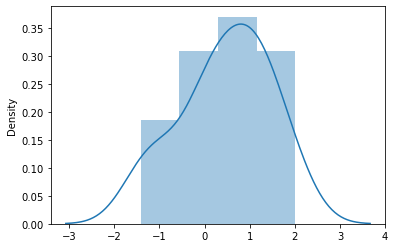

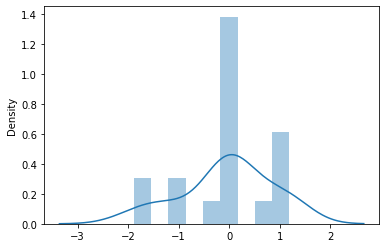

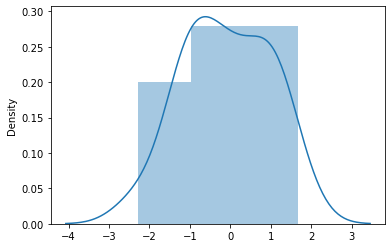

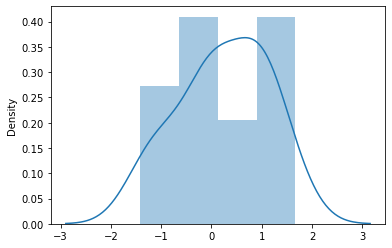

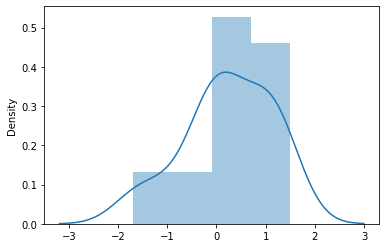

In [58]:
# visualize data after power transform
x1=scaled_f
for i in range(1,20):
    sns.distplot(x1[i])
    plt.show()

In [59]:
# now we will get the highly correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [60]:
corr_features = correlation(df, 0.5)
len(set(corr_features))

4

In [61]:
corr_features   # these columns are highly related columns

{'age', 'injury_claim', 'property_claim', 'vehicle_claim'}

In [62]:
# dropping less correalted columns with target and putting them in X and y
X=features.drop(columns=[ 'policy_number','policy_annual_premium','insured_sex','capital-gains', 'capital-loss'],axis=1)
y=labels

In [63]:
# now we will scale it again by using Standard Scaler
scaler=StandardScaler()
Scaled=scaler.fit_transform(X)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (Scaled, i) for i in range (Scaled.shape[1])]
vif["Features"] = X.columns
#vif must be done after scaling the data 
#Let's check the values
vif

vif                     Features
0       6.791291           months_as_customer
1       6.783009                          age
2       1.022064            policy_deductable
3            NaN               umbrella_limit
4       1.009632                  insured_zip
5       1.067055     incident_hour_of_the_day
6       1.095277  number_of_vehicles_involved
7       1.009305              bodily_injuries
8       1.021194                    witnesses
9   47697.981985           total_claim_amount
10   1627.430908                 injury_claim
11   1602.021897               property_claim
12  24387.921099                vehicle_claim
13      1.011510                    auto_year

As we see, the vif score of columns total_claim_amount,injury_claim, property_claim, and vehicle_claim is greater than 5, which means these are highly multicollinear. The predictor variable has a high correlation with other predictor variables, indicating a potential problem with multicollinearity. It is recommended to consider removing or transforming this variable.

We have to remove these columns as they will affect our model accuracy in the future.

In [65]:
X.drop(columns=['total_claim_amount','injury_claim','property_claim','vehicle_claim'],axis=1)

months_as_customer  age  policy_deductable  umbrella_limit  insured_zip  \
0                   328   48               1000               0     466132.0   
1                   228   42               2000               0     468176.0   
2                   134   29               2000               0     430632.0   
3                   256   41               2000               0     608117.0   
4                   228   44               1000               0     610706.0   
..                  ...  ...                ...             ...          ...   
995                   3   38               1000               0     431289.0   
996                 285   41               1000               0     608177.0   
997                 130   34                500               0     442797.0   
998                 458   62               2000               0     441714.0   
999                 456   60               1000               0     612260.0   

     incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
0                         5.0                            1                1   
1                         8.0                            1                0   
2                         7.0                            3                2   
3                         5.0                            1                1   
4                        20.0                            1                0   
..                        ...                          ...              ...   
995                      20.0                            1                0   
996                      23.0                            1                2   
997                       4.0                            3                2   
998                       2.0                            1                0   
999                       6.0                            1                0   

     witnesses  auto_year  
0          2.0       2004  
1          0.0       2007  
2          3.0       2007  
3          2.0       2014  
4          1.0       2009  
..         ...        ...  
995        1.0       2006  
996        3.0       2015  
997        3.0       1996  
998        1.0       1998  
999        3.0       2007  

[1000 rows x 10 columns]

## Apllying ML

In [66]:
# importing libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [67]:
# define oversampling strategy and checking for it.
oversample = RandomOverSampler(sampling_strategy=0.5)

In [68]:
# Define dataset
X, y = make_classification(n_samples=250, weights=[0.193], flip_y=0)

# Summarize class distribution
print("Original class distribution:")
print(Counter(y))

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Summarize class distribution
print("Oversampled class distribution:")
print(Counter(y_over))

Original class distribution:
Counter({1: 201, 0: 49})
Oversampled class distribution:
Counter({1: 201, 0: 201})


Now we will train or test the data and will check there accuracy

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

### LR Model

In [70]:
# For Logestic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
train_accuracy=accuracy_score(y_test,predlr)*100
test_accuracy=accuracy_score(y_train,pred_train_lr)*100
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

[[ 9  1]
 [ 2 51]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.98      0.96      0.97        53

    accuracy                           0.95        63
   macro avg       0.90      0.93      0.91        63
weighted avg       0.95      0.95      0.95        63



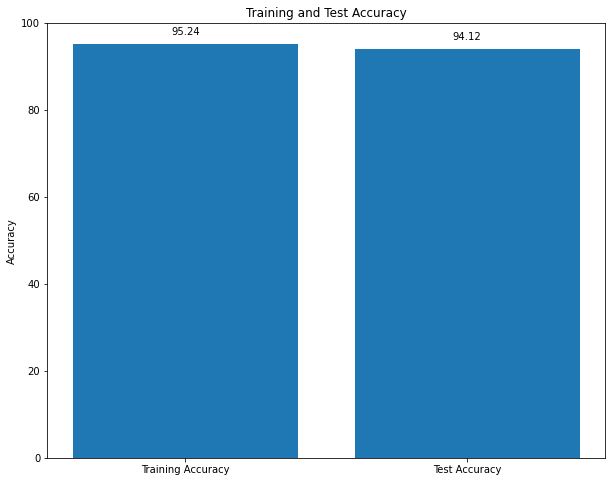

In [71]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### KNN Model

In [72]:
# For KNN
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
test_accuracy=accuracy_score(y_test,predKNN)*100
train_accuracy=accuracy_score(y_train,pred_train_KNN)*100
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

[[ 5  5]
 [ 0 53]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.91      1.00      0.95        53

    accuracy                           0.92        63
   macro avg       0.96      0.75      0.81        63
weighted avg       0.93      0.92      0.91        63



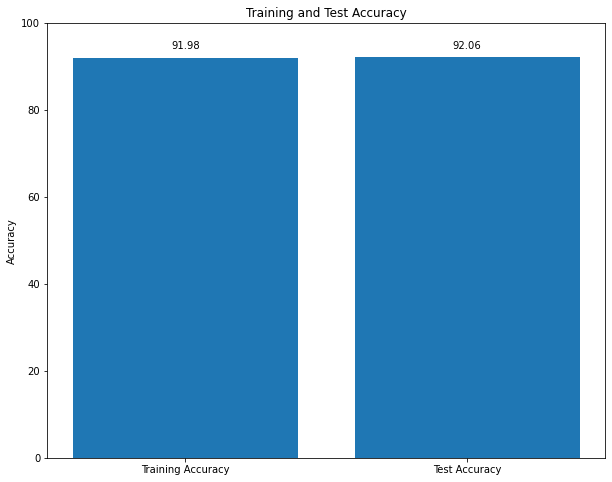

In [73]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Decision Tree Model

In [74]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
test_accuracy=accuracy_score(y_test,preddt)*100
train_accuracy=accuracy_score(y_train,pred_train_dt)*100
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

[[ 9  1]
 [ 8 45]]
              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.98      0.85      0.91        53

    accuracy                           0.86        63
   macro avg       0.75      0.87      0.79        63
weighted avg       0.91      0.86      0.87        63



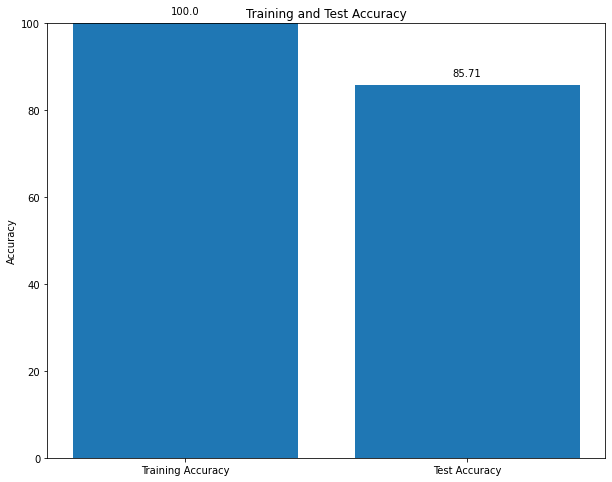

In [75]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Random Forest Model

In [76]:
# for RDF model
rdf =RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
test_accuracy=accuracy_score(y_test,predrdf)*100
train_accuracy=accuracy_score(y_train,pred_train_rdf)*100
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

[[ 9  1]
 [ 1 52]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        53

    accuracy                           0.97        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.97      0.97      0.97        63



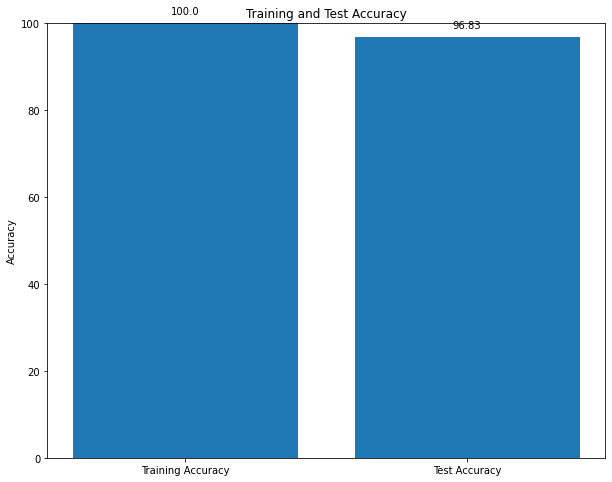

In [77]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

In [78]:
# For SVC model
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
test_accuracy=accuracy_score(y_test,pred_svc)*100
train_accuracy=accuracy_score(y_train,pred_train_svc)*100
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

[[ 6  4]
 [ 0 53]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.93      1.00      0.96        53

    accuracy                           0.94        63
   macro avg       0.96      0.80      0.86        63
weighted avg       0.94      0.94      0.93        63



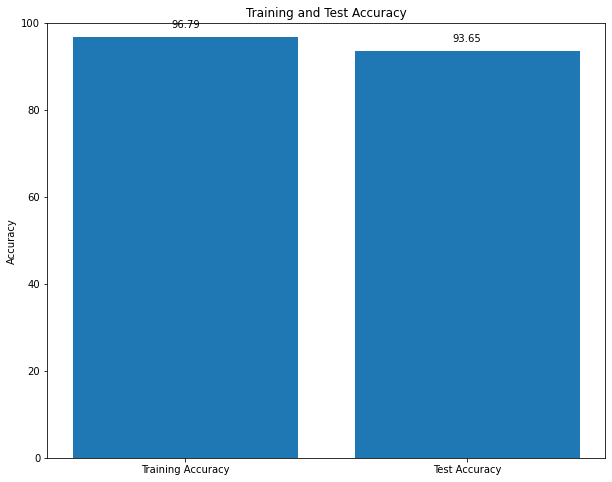

In [79]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Cross validate score

In [80]:
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LR model :",cr_1.mean()*100)

Cross Validation Score of LR model : 92.0


In [81]:
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNN model :",cr_2.mean()*100)

Cross Validation Score of KNN model : 88.80000000000001


In [82]:
cr_3=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DT model :",cr_3.mean()*100)

Cross Validation Score of DT model : 86.8


In [83]:
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RDF model :",cr_4.mean()*100)

Cross Validation Score of RDF model : 94.39999999999999


In [84]:
cr_5=cross_val_score(svc,X,y,cv=5)
print("Cross Validation Score of SVC model :",cr_5.mean()*100)

Cross Validation Score of SVC model : 90.40000000000002


From the cross-validate score and test accuracy score, it is clear that the RandomForestClassifier model has the highest number in both cross-validate (94.39) and test accuracy (97%), so we will do hyperparameter tuning with the RDF model.

In [85]:
RandomForestClassifier()
parameters={'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy']}

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [86]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)*100

95.23809523809523

## roc_auc Curve

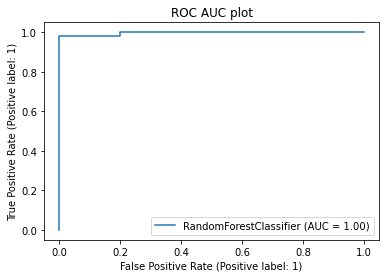

In [87]:
plot_roc_curve(GCV.best_estimator_,X_test,y_test)  
plt.title("ROC AUC plot")
plt.show() 

### Conclusion
Based on the analysis, the model shows promising results in predicting insurance claim fraud. However, it is important to note that no model can guarantee 100% accuracy in identifying fraudulent claims. The model's performance indicates a high level of predictive capability, but there might still be some cases where misclassifications or uncertainties occur. Further evaluation, continuous monitoring, and domain expertise are crucial to effectively identify and handle potential fraudulent claims in real-world scenarios.  

### Model Saving

In [90]:
import pickle

# Train the model and obtain the best_rf model

# Save the model to a file
with open('Rainfall_weather_forecasting.pkl', 'wb') as file:
    pickle.dump(GCV.best_estimator_, file)

#### Finish